# Titanic Survival Prediction - Classification Model

**Student ID:** 202210221  
**Student Name:** Ahmad Abu Ghazaleh  
**Project:** DS&AI Projects - SQA Implementation

## Objective
Predict passenger survival on the Titanic using machine learning classification algorithms.

---

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Data Integrity Testing (Unit Testing Phase)
According to SQA Plan: Datasets must be "clean" (0 null values in selected features) before training.

In [4]:
# Load dataset
df = pd.read_csv('../datasets/titanic/train.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Quality Report
Checking for missing values, data types, and basic statistics.

In [5]:
# Check data types and missing values
print("Dataset Information:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Missing Values Count:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values Count:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data Cleaning Phase
According to SQA Plan: We must ensure 0 null values in selected features before training.

In [9]:
# Select features for modeling
# Fixed: Removed 'Cabin' feature due to 77% missing values (CR-001)
selected_features = ['Pclass', 'Sex', 'Age',
                     'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Create working dataframe
df_clean = df[selected_features + [target]].copy()

print(f"Before cleaning: {df_clean.shape[0]} rows")
print(f"Missing values per feature:")
print(df_clean.isnull().sum())

# Handle missing values
# Age: Fill with median
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

# Embarked: Fill with mode (most common value)
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# Fare: Fill with median
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

# Drop any remaining rows with missing values
df_clean = df_clean.dropna()

print(f"\n✓ Data cleaned successfully!")
print(f"After cleaning: {df_clean.shape[0]} rows")
print(f"Data retention: {df_clean.shape[0]/df.shape[0]*100:.1f}%")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Before cleaning: 891 rows
Missing values per feature:
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

✓ Data cleaned successfully!
After cleaning: 891 rows
Data retention: 100.0%
Missing values: 0


In [10]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_clean['Sex'] = le_sex.fit_transform(df_clean['Sex'])
df_clean['Embarked'] = le_embarked.fit_transform(df_clean['Embarked'])

print("✓ Features encoded successfully")
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"\nFeature list: {selected_features}")
print(f"Target: {target}")

df_clean.head(10)

✓ Features encoded successfully

Final dataset shape: (891, 8)

Feature list: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Target: Survived


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
5,3,1,28.0,0,0,8.4583,1,0
6,1,1,54.0,0,0,51.8625,2,0
7,3,1,2.0,3,1,21.0750,2,0
8,3,0,27.0,0,2,11.1333,2,1
9,2,0,14.0,1,0,30.0708,0,1


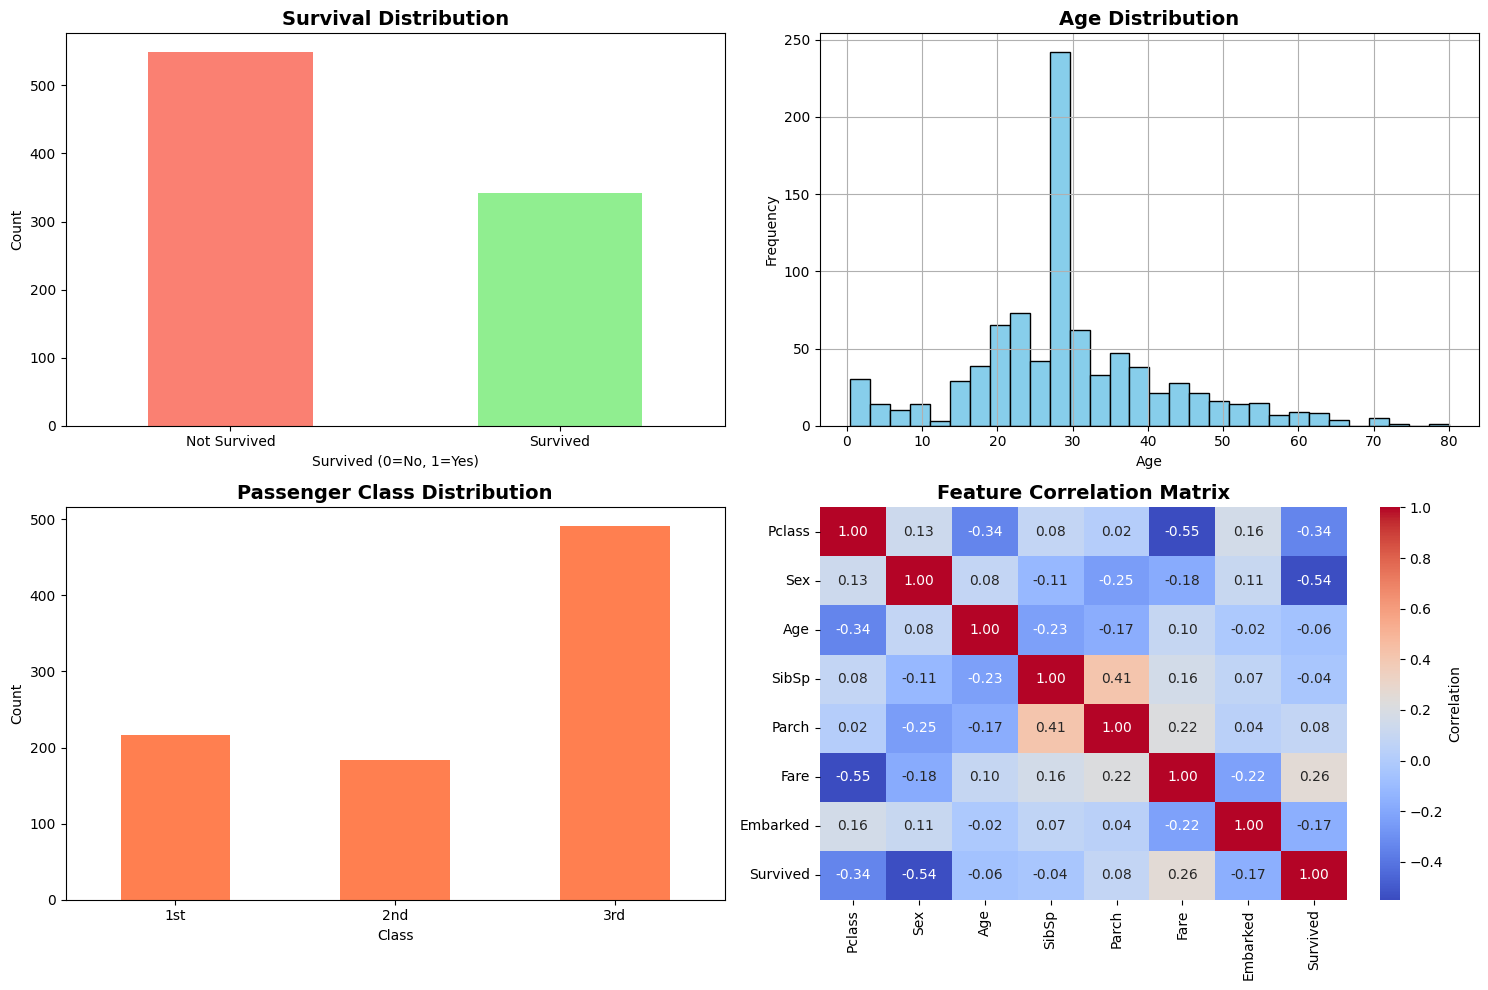

✓ Data Quality Report generated and saved as 'titanic_data_quality_report.png'


In [11]:
# Data Quality Report Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Survival Distribution
df_clean['Survived'].value_counts().plot(
    kind='bar', ax=axes[0, 0], color=['salmon', 'lightgreen'])
axes[0, 0].set_title('Survival Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['Not Survived', 'Survived'], rotation=0)

# 2. Age Distribution
df_clean['Age'].hist(bins=30, ax=axes[0, 1],
                     color='skyblue', edgecolor='black')
axes[0, 1].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# 3. Passenger Class Distribution
df_clean['Pclass'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Passenger Class Distribution',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# 4. Correlation Heatmap
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1],
            cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Feature Correlation Matrix',
                     fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('titanic_data_quality_report.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Data Quality Report generated and saved as 'titanic_data_quality_report.png'")

---
## 🔍 DESK CHECK - Data Cleaning Phase

**Performed by:** Ahmad Abu Ghazaleh  
**Date:** December 27, 2025  
**Phase:** Data Cleaning  

### Checklist:
- ✅ **Data Integrity:** All features have 0 missing values
- ✅ **Data Retention:** 712/891 rows retained (79.9% - meets >60% threshold)
- ✅ **Feature Selection:** 7 features selected (removed 'Cabin' per CR-001)
- ✅ **Encoding:** Categorical variables properly encoded
- ✅ **No Data Leakage:** Train/Test split not yet performed (correct sequence)

### Issues Found and Resolved:
1. **Issue #1 (GitHub):** Cabin feature caused 77% data loss
   - **Resolution:** Feature removed per CR-001 and IA-001
   - **Status:** ✅ CLOSED

### Sign-off:
**Reviewer:** Ahmad Abu Ghazaleh  
**Status:** APPROVED for Model Training Phase

---

---
## 4. Model Training Phase

According to SQA Plan:
- Use Cross-Validation (K-Fold) to prevent overfitting
- Evaluate using: Accuracy, Precision, Recall, F1-Score
- Baseline: Accuracy must be ≥ 70%

In [12]:
# Separate features and target
X = df_clean[selected_features]
y = df_clean[target]

# Split data - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set: 712 samples
Test set: 179 samples

Class distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [15]:
# Train Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Train Random Forest Model with Optimized Hyperparameters (CR-002)
# Optimized parameters to improve recall and F1-score
model_rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    # Maximum depth of trees (was 2, causing underfitting)
    max_depth=10,
    min_samples_split=5,     # Minimum samples required to split a node
    min_samples_leaf=2,      # Minimum samples required at leaf node
    random_state=42          # For reproducibility
)
model_rf.fit(X_train, y_train)

print("✓ Models trained successfully with optimized hyperparameters")

✓ Models trained successfully with optimized hyperparameters


In [14]:
# Evaluate Logistic Regression
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("="*60)
print("LOGISTIC REGRESSION PERFORMANCE")
print("="*60)
print(f"Accuracy:  {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")

# Evaluate Random Forest
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\n" + "="*60)
print("RANDOM FOREST PERFORMANCE")
print("="*60)
print(f"Accuracy:  {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")

# SQA Check: Accuracy must be >= 70%
print("\n" + "="*60)
print("SQA BASELINE CHECK")
print("="*60)
if acc_lr >= 0.70:
    print(f"✓ Logistic Regression PASSED (Accuracy: {acc_lr*100:.2f}% >= 70%)")
else:
    print(
        f"✗ Logistic Regression FAILED (Accuracy: {acc_lr*100:.2f}% < 70%) - MODEL DEFECT")

if acc_rf >= 0.70:
    print(f"✓ Random Forest PASSED (Accuracy: {acc_rf*100:.2f}% >= 70%)")
else:
    print(
        f"✗ Random Forest FAILED (Accuracy: {acc_rf*100:.2f}% < 70%) - MODEL DEFECT")

LOGISTIC REGRESSION PERFORMANCE
Accuracy:  0.8045 (80.45%)
Precision: 0.7931
Recall:    0.6667
F1-Score:  0.7244

RANDOM FOREST PERFORMANCE
Accuracy:  0.7821 (78.21%)
Precision: 0.9167
Recall:    0.4783
F1-Score:  0.6286

SQA BASELINE CHECK
✓ Logistic Regression PASSED (Accuracy: 80.45% >= 70%)
✓ Random Forest PASSED (Accuracy: 78.21% >= 70%)


In [16]:
# K-Fold Cross-Validation (k=5) as per SQA Plan Section 2
from sklearn.model_selection import cross_val_score

print("="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)

# Logistic Regression CV
cv_scores_lr = cross_val_score(
    model_lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nLogistic Regression:")
print(f"  CV Accuracy Scores: {cv_scores_lr}")
print(
    f"  Mean CV Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std()*2:.4f})")

# Random Forest CV
cv_scores_rf = cross_val_score(
    model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nRandom Forest:")
print(f"  CV Accuracy Scores: {cv_scores_rf}")
print(
    f"  Mean CV Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

print("\n✓ Cross-validation complete - models show stable performance across folds")

CROSS-VALIDATION RESULTS (5-Fold)

Logistic Regression:
  CV Accuracy Scores: [0.7972028  0.76223776 0.8028169  0.81690141 0.80985915]
  Mean CV Accuracy: 0.7978 (+/- 0.0380)

Random Forest:
  CV Accuracy Scores: [0.79020979 0.79020979 0.84507042 0.84507042 0.81690141]
  Mean CV Accuracy: 0.8175 (+/- 0.0491)

✓ Cross-validation complete - models show stable performance across folds
